In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from os import listdir
import re
import json
import datetime
import seaborn as sns

import sys
sys.path.insert(1, '../src/')

# from features import *

# Clean 8k corpus

In [113]:
all_failed_doc = []

def clean_doc_text(doc_text):
    doc_text = re.sub('\n+', '\n', doc_text)
    cleaned_text = ''
    for sent in doc_text.split('\n'):
        cleaned_text += re.sub('\s+', ' ', sent)
        cleaned_text += '\n'
    doc_text = re.sub('\\t', ' ', doc_text)
    return doc_text



def handle_single_document(doc):
    time, event_type = None, None
    if doc.strip() == '\n' or doc == '\n' or doc == '':
        pass
    elif 'EVENTS:' not in doc or 'TIME:' not in doc:
        all_failed_doc.append(doc)
    else:
        time = re.findall('TIME:.+\\n', doc)[0]
        event_type = re.findall('EVENTS:.+\\n', doc)[0]
    return time, event_type

In [114]:
all_data_dict = {}
for fp in tqdm(listdir('data/8k')):
    if fp == '.DS_Store':
        continue
    full_path = 'data/8k/' + fp
    file = open(full_path, 'r')
    tmp_txt = ''
    for line in file:
        tmp_txt += line
    
    tmp_all_docs = []
    for doc in tmp_txt.split('</DOCUMENT>'):
        time, event_type = handle_single_document(doc.replace('</DOCUMENT>', ''))
        if time:
            tmp_dict = {}
            tmp_dict['time'] = time
            tmp_dict['event_type'] = event_type
            tmp_dict['full_text'] = clean_doc_text(doc.replace('</DOCUMENT>', ''))
            tmp_all_docs.append(tmp_dict)
    all_data_dict[fp] = tmp_all_docs

100%|██████████| 1500/1500 [08:23<00:00,  2.98it/s]


In [115]:
list(all_data_dict.keys())[:3]

['LANC', 'CTAS', 'DMND']

In [116]:
with open('data/processed/8k.json', 'w') as outfile:
    json.dump(all_data_dict, outfile)

In [117]:
tmp_text = all_data_dict['AAPL'][0]['full_text']
tmp_text

"<DOCUMENT>\nFILE:AAPL/AAPL-8K-20020802185957.txt.gz\nTIME:20020802185957\nEVENTS: Other events Financial statements and exhibits\nTEXT:\nITEM: Other events\nITEM: Financial statements and exhibits\nQuickLinks\n-- Click here to rapidly navigate through this document\nItems 1 through 4, 6, 8 and 9 Not Applicable.\n        Reference is made to the SEC Form 4 Statement of Changes in Beneficial Ownership filed with the Securities and Exchange Commission by Mr. Arthur Levinson on August 2, 2002. A copy of Mr. Levinson's SEC Form 4 is attached hereto as an exhibit.\nPursuant to the requirements of the Securities Exchange Act of 1934, the registrant has duly caused this report to be signed on its behalf by the undersigned, thereunto duly authorized.\nDate: August 1, 2002\nQuickLinks\nInformation Included in this Report\nSIGNATURE\nINDEX TO EXHIBITS\nQuickLinks\n-- Click here to rapidly navigate through this document\nExhibit 99.1\nExplanation of Responses:\nQuickLinks\nExhibit 99.1\n"

In [110]:
re.sub('\s+', ' ', tmp_text.split('\n')[10])

" Reference is made to the SEC Form 4 Statement of Changes in Beneficial Ownership filed with the Securities and Exchange Commission by Mr. Arthur Levinson on August 2, 2002. A copy of Mr. Levinson's SEC Form 4 is attached hereto as an exhibit."

In [118]:
all_data_dict['AAPL']

[{'time': 'TIME:20020802185957\n',
  'event_type': 'EVENTS:\tOther events\tFinancial statements and exhibits\n',
  'full_text': "<DOCUMENT>\nFILE:AAPL/AAPL-8K-20020802185957.txt.gz\nTIME:20020802185957\nEVENTS: Other events Financial statements and exhibits\nTEXT:\nITEM: Other events\nITEM: Financial statements and exhibits\nQuickLinks\n-- Click here to rapidly navigate through this document\nItems 1 through 4, 6, 8 and 9 Not Applicable.\n        Reference is made to the SEC Form 4 Statement of Changes in Beneficial Ownership filed with the Securities and Exchange Commission by Mr. Arthur Levinson on August 2, 2002. A copy of Mr. Levinson's SEC Form 4 is attached hereto as an exhibit.\nPursuant to the requirements of the Securities Exchange Act of 1934, the registrant has duly caused this report to be signed on its behalf by the undersigned, thereunto duly authorized.\nDate: August 1, 2002\nQuickLinks\nInformation Included in this Report\nSIGNATURE\nINDEX TO EXHIBITS\nQuickLinks\n-- Cl

# Clean price history

In [2]:
tmp_price = pd.read_csv('../data/price_history/AAPL.csv')
tmp_price.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2013-02-01,459.11,459.48,448.35,453.62,19253700,453.62
1,2013-01-31,456.98,459.28,454.98,455.49,11404800,455.49
2,2013-01-30,457.00,462.60,454.50,456.83,14898400,456.83
3,2013-01-29,458.50,460.20,452.12,458.27,20398500,458.27
4,2013-01-28,437.83,453.21,435.86,449.83,28054200,449.83


In [3]:
sample_tmp_price = tmp_price.head(500)

In [23]:
# sample_tmp_price = process_single_company(sample_tmp_price)

In [6]:
sample_tmp_price.tail(10)

,Date,Open,High,Low,Close,Volume,Adj Close,time_idx,price_change_7,price_change_30,price_change_90,price_change_365
490,2011-02-18,358.71,359.50,349.52,350.56,29144900,347.47,11,-1.76,NaN,NaN,NaN
491,2011-02-17,357.25,360.27,356.52,358.30,18949400,355.15,10,1.06,NaN,NaN,NaN
492,2011-02-16,360.80,364.90,360.50,363.13,17184200,359.93,9,1.39,NaN,NaN,NaN
493,2011-02-15,359.19,359.97,357.55,359.90,10149100,356.73,8,1.32,NaN,NaN,NaN
494,2011-02-14,356.79,359.48,356.71,359.18,11086300,356.02,7,2.08,NaN,NaN,NaN
495,2011-02-11,354.75,357.80,353.54,356.85,13127600,353.71,4,NaN,NaN,NaN,NaN
496,2011-02-10,357.39,360.00,348.00,354.54,33162500,351.42,3,NaN,NaN,NaN,NaN
497,2011-02-09,355.19,359.00,354.87,358.16,17240900,355.01,2,NaN,NaN,NaN,NaN
498,2011-02-08,353.68,355.52,352.15,355.20,13608600,352.07,1,NaN,NaN,NaN,NaN
499,2011-02-07,347.89,353.25,347.64,351.88,17322200,348.78,0,NaN,NaN,NaN,NaN


# Prepare sp500 data

In [28]:
sp500_df = pd.read_csv('../data/raw/sp500.csv')
# sp500_df.head()

In [30]:
sp500_df['day_change'] = sp500_df.apply(lambda s: (s['Adj Close'] - s['Open']) / s['Open'] * 100, axis = 1) 
sp500_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,day_change
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000,-0.630520
23192,2020-05-01,2869.090088,2869.090088,2821.610107,2830.709961,2830.709961,4753160000,-1.337711
23193,2020-05-04,2815.010010,2844.239990,2797.850098,2842.739990,2842.739990,4723140000,0.985076
23194,2020-05-05,2868.879883,2898.229980,2863.550049,2868.439941,2868.439941,5129590000,-0.015335
23195,2020-05-06,2883.139893,2891.110107,2847.649902,2848.419922,2848.419922,4861920000,-1.204242


In [37]:
sp500_df[['Date', 'day_change']].to_csv('../data/processed/sp500.csv', index = False)

# Merge eps and 8k text

In [6]:
with open('../data/processed/8k.json') as json_file:
    all_data_dict = json.load(json_file)

In [7]:
def clean_time(time_str):
    time_str = re.sub('[^0-9]', '', time_str)
    date = time_str[:8]
    time = time_str[8:]
    return date, time
clean_time('TIME:20021223145756\n')

('20021223', '145756')

In [8]:
len(list(all_data_dict.keys()))

1500

In [9]:
all_8k_lst = []
doc_counter = 0
for symbol in tqdm(all_data_dict.keys()):
    tmp_docs = all_data_dict[symbol]
    for doc in tmp_docs:
        doc_counter += 1
        date, time = clean_time(doc['time'])
        all_8k_lst.append({
            'date': date,
            'time': time,
            'event_type': doc['event_type'],
            'full_text': doc['full_text'],
            'Code': symbol
        })
all_8k_df = pd.DataFrame(all_8k_lst)
all_8k_df['time_code'] = all_8k_df.date + all_8k_df.Code
all_8k_df.head(2)

100%|██████████| 1500/1500 [00:05<00:00, 272.82it/s]


,date,time,event_type,full_text,Code,time_code
0,20020624,155903,EVENTS:\tOther events\tFinancial statements an...,<DOCUMENT>\nFILE:CNL/CNL-8K-20020624155903.txt...,CNL,20020624CNL
1,20020725,172421,EVENTS:\tOther events\tFinancial statements an...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20020725172421.t...,CNL,20020725CNL


In [10]:
all_8k_df.shape[0], doc_counter, all_8k_df.time_code.nunique()

(195140, 195140, 191295)

In [108]:
eps_df = pd.read_csv('../data/processed/EPS.csv')
eps_df['time_code'] = eps_df['Report Date'].apply(lambda x: str(x)) + eps_df.Code
eps_df.head(2)

,Report Date,Code,Surprise(%),Reported EPS,Consensus EPS,time_code
0,20030716,AMR,14.72,-2.26,-2.65,20030716AMR
1,20030716,AMD,25.93,-0.40,-0.54,20030716AMD


In [109]:
eps_df.shape

(133343, 6)

In [71]:
merged_df = all_8k_df.merge(eps_df, how = 'inner', on = 'time_code').dropna()
merged_df = merged_df\
    .drop(columns = ['Code_x', 'Report Date', 'time_code'])\
    .rename(columns = {'Code_y': 'symbol'})
merged_df.head(2)

,date,time,event_type,full_text,symbol,Surprise(%),Reported EPS,Consensus EPS
0,20030508,163240,EVENTS:\tOther events\tFinancial statements an...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030508163240.t...,CNL,33.33,0.36,0.27
1,20030811,163859,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030811163859.t...,CNL,-5.56,0.34,0.36


In [72]:
merged_df.shape

(37356, 8)

In [73]:
merged_df.symbol.nunique()

1452

In [74]:
merged_df['hr'] = merged_df.time.apply(lambda time: float(time[:4]) / 100)

/Users/joey-hou/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


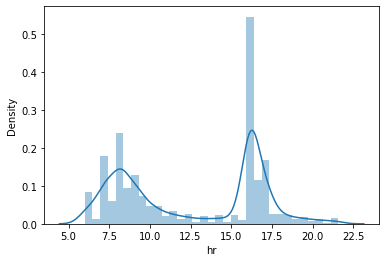

In [75]:
sns.distplot(merged_df.hr)

In [76]:
merged_df['pre_market'] = merged_df['hr'] < 9.5
merged_df.head(5)

,date,time,event_type,full_text,symbol,Surprise(%),Reported EPS,Consensus EPS,hr,pre_market
0,20030508,163240,EVENTS:\tOther events\tFinancial statements an...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030508163240.t...,CNL,33.33,0.36,0.27,16.32,False
1,20030811,163859,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030811163859.t...,CNL,-5.56,0.34,0.36,16.38,False
2,20031106,163525,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20031106163525.t...,CNL,14.29,0.48,0.42,16.35,False
3,20040309,170611,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20040309170611.t...,CNL,-150.00,-0.06,0.12,17.06,False
4,20040505,161507,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20040505161507.t...,CNL,3.85,0.27,0.26,16.15,False


In [77]:
merged_df.date = merged_df.date.apply(lambda x: pd.to_datetime(x[:4] + '-' + x[4:6] + '-' + x[6:]))
merged_df.head(2)

,date,time,event_type,full_text,symbol,Surprise(%),Reported EPS,Consensus EPS,hr,pre_market
0,2003-05-08,163240,EVENTS:\tOther events\tFinancial statements an...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030508163240.t...,CNL,33.33,0.36,0.27,16.32,False
1,2003-08-11,163859,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030811163859.t...,CNL,-5.56,0.34,0.36,16.38,False


# Merge the 8k&eps and price history

In [78]:
price_history_dir = '../data/raw/price_history/'

In [79]:
min_date = merged_df.date.min()
merged_df['date_idx'] = merged_df.date.apply(lambda x: (x - min_date).days)
max_date_idx = merged_df['date_idx'].max()
min_date

Timestamp('2002-11-01 00:00:00')

In [80]:
sp500_df = pd.read_csv('../data/processed/sp500.csv')
sp500_df.Date = sp500_df.Date.apply(lambda x: pd.to_datetime(x))
sp500_df['date_idx'] = sp500_df.Date.apply(lambda x: (x - min_date).days)
sp500_df = sp500_df.query('date_idx >= 0').reset_index(drop = True)
sp500_df.index = sp500_df.date_idx
sp500_dict = dict(sp500_df.day_change)
sp500_df.head()

,Date,day_change,date_idx
date_idx,,,
0,2002-11-01,1.716042,0
3,2002-11-04,0.820231,3
4,2002-11-05,0.775036,4
5,2002-11-06,0.914364,5
6,2002-11-07,-2.285224,6


In [81]:
(list(sp500_dict.items()))[:3]

[(0, 1.7160417978228808), (3, 0.8202310668119606), (4, 0.775035964772249)]

In [82]:
def calc_price_changes(price_df, date_delta, most_recent_dates):
    price_delta = []
    for date_idx in most_recent_dates:
        if date_idx == -1:
            price_delta.append(np.nan)
            continue
            
        # Check if previous trading date is logged
        prev_date = date_idx - date_delta
        while prev_date not in price_df.date_idx.values and prev_date >= 0:
            prev_date -= 1
        if prev_date < 0:
            price_delta.append(np.nan)
            continue

        # Find prev info
        prev_close = price_df.query('date_idx == "' + str(prev_date) + '"')['Adj Close'].values[0]
        curr_close = price_df.query('date_idx == "' + str(date_idx) + '"')['Adj Close'].values[0]
        percent_change = round((curr_close - prev_close) / prev_close * 100, 2)
        price_delta.append(percent_change)
    return price_delta

def calc_prediction_target(price_df, dates_pairs, sp500_dict):
    price_delta = []
    for pair in dates_pairs:
        curr_date, target_date = pair
        if curr_date == -1 or target_date == -1:
            price_delta.append(np.nan)
            continue

        # Find stock price change info
        curr_close = price_df.query('date_idx == "' + str(curr_date) + '"')['Adj Close'].values[0]
        target_close = price_df.query('date_idx == "' + str(target_date) + '"')['Adj Close'].values[0]
        stock_percent_change = round((target_close - curr_close) / curr_close * 100, 2)
        
        # Fine sp500 price change info
        sp500_change = sp500_dict[target_date]
        price_delta.append(stock_percent_change - sp500_change)
    return price_delta

In [89]:
merged_df.shape

(37356, 11)

In [84]:
# merged_df['most_recent_date_idx'] = -1
# merged_df['target_date_idx'] = -1

symbol_missing_price = []
sub_dfs = []
for symbol in tqdm(merged_df.symbol.unique()):
    try:
        price_hist_df = pd.read_csv(price_history_dir + symbol + '.csv')
    except:
        symbol_missing_price.append(symbol)
        continue
        
    # pre-process price_history
    price_hist_df.Date = price_hist_df.Date.apply(lambda x: (pd.to_datetime(x)))
    price_hist_df['date_idx'] = price_hist_df.Date.apply(lambda x: (x - min_date).days)
    
    # Get intended dates
    tmp_merged_df = merged_df.query('symbol == "' + symbol + '"').reset_index(drop = True)
    
    most_recent_dates = []
    pred_rarget_dates = []
    for index, row in tmp_merged_df.iterrows():
        most_recent_date_idx = row.date_idx
        target_date_idx = row.date_idx
        if row.pre_market:
            most_recent_date_idx -= 1
        else:
            target_date_idx += 1

        # Adjust most recent date
        while most_recent_date_idx not in price_hist_df.date_idx.values and most_recent_date_idx >= 0:
            most_recent_date_idx -= 1
        if most_recent_date_idx <= 0:
            most_recent_date_idx = -1
            
        # Adjust target date
        while target_date_idx not in price_hist_df.date_idx.values and target_date_idx <= max_date_idx:
            target_date_idx += 1
        if target_date_idx > max_date_idx:
            target_date_idx = -1
        
        pred_rarget_dates.append((most_recent_date_idx, target_date_idx))
        most_recent_dates.append(most_recent_date_idx)
     
    # find out price changes
    for date_delta in [7, 30, 90, 365]:
        tmp_price_changes = calc_price_changes(price_hist_df, date_delta, most_recent_dates)
        tmp_merged_df['price_change_' + str(date_delta)] = tmp_price_changes
    tmp_merged_df['targe_price_change'] = calc_prediction_target(price_hist_df, pred_rarget_dates, sp500_dict)
    sub_dfs.append(tmp_merged_df)
updated_merged_df = pd.concat(sub_dfs)

100%|██████████| 1452/1452 [25:22<00:00,  1.05s/it]


In [85]:
# price_hist_df.head()
updated_merged_df.head()

,date,time,event_type,full_text,symbol,Surprise(%),Reported EPS,Consensus EPS,hr,pre_market,date_idx,price_change_7,price_change_30,price_change_90,price_change_365,targe_price_change
0,2003-05-08,163240,EVENTS:\tOther events\tFinancial statements an...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030508163240.t...,CNL,33.33,0.36,0.27,16.32,False,188,1.99,13.04,21.35,NaN,-2.797837
1,2003-08-11,163859,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030811163859.t...,CNL,-5.56,0.34,0.36,16.38,False,283,-0.99,-7.20,3.89,NaN,0.374686
2,2003-11-06,163525,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20031106163525.t...,CNL,14.29,0.48,0.42,16.35,False,370,1.43,2.81,14.20,14.97,-0.122546
3,2004-03-09,170611,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20040309170611.t...,CNL,-150.00,-0.06,0.12,17.06,False,494,-0.58,2.48,11.09,78.98,-1.036715
4,2004-05-05,161507,EVENTS:\t\tFinancial statements and exhibits\n,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20040505161507.t...,CNL,3.85,0.27,0.26,16.15,False,551,-0.16,-5.21,-1.62,25.02,0.832299


In [ ]:
# intended_dates = price_hist_df.query('date_idx > 0').sample(10).date_idx.values
# intended_dates

In [98]:
# calc_price_changes(price_hist_df, 7, intended_dates)

In [88]:
updated_merged_df.head().T

,0,1,2,3,4
date,2003-05-08 00:00:00,2003-08-11 00:00:00,2003-11-06 00:00:00,2004-03-09 00:00:00,2004-05-05 00:00:00
time,163240,163859,163525,170611,161507
event_type,EVENTS:\tOther events\tFinancial statements an...,EVENTS:\t\tFinancial statements and exhibits\n,EVENTS:\t\tFinancial statements and exhibits\n,EVENTS:\t\tFinancial statements and exhibits\n,EVENTS:\t\tFinancial statements and exhibits\n
full_text,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030508163240.t...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20030811163859.t...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20031106163525.t...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20040309170611.t...,\n<DOCUMENT>\nFILE:CNL/CNL-8K-20040505161507.t...
symbol,CNL,CNL,CNL,CNL,CNL
Surprise(%),33.33,-5.56,14.29,-150,3.85
Reported EPS,0.36,0.34,0.48,-0.06,0.27
Consensus EPS,0.27,0.36,0.42,0.12,0.26
hr,16.32,16.38,16.35,17.06,16.15
pre_market,False,False,False,False,False


In [86]:
updated_merged_df.shape

(37356, 16)

In [87]:
updated_merged_df.dropna().shape

(34891, 16)

In [125]:
updated_merged_df.dropna().to_csv('../data/processed/merged_all_data.csv', index = False)

In [104]:
# in_file = open('../test/processed/AutoPhrase_multi-words.txt', 'r')
# out_file = open('../test/processed/AutoPhrase_multi-words copy.txt', 'w')

In [105]:
# for line in in_file.readlines():
#     score = float(line.split()[0])
#     if score >= 0.9:
#         out_file.write(line)
# out_file.close()

In [114]:
def func(a, **kwargs):
    print(a)
    print(kwargs)

In [117]:
func(1, dird = '1')

1
{'dird': '1'}


In [ ]:
{'hello': 1}